In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import io
import os
import tradingWithPython as twp
from tradingWithPython import sharpe # general trading toolbox functions
import tradingWithPython.lib.yahooFinance as yf
from tradingWithPython import cboe_ckc as ckc
import pandas as pd # pandas time series library
from datetime import datetime
import quandl
quandl.ApiConfig.api_key = 'wxychbrgu7o7x3MRq4Hx'

C:\Users\chekitsch\Anaconda3\lib\site-packages\tradingWithPython\lib\cboe.py:11: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
priceData = quandl.get('CHRIS/CME_GC1')

In [18]:
priceData['UBC'] = priceData.High.rolling(window=250).max()

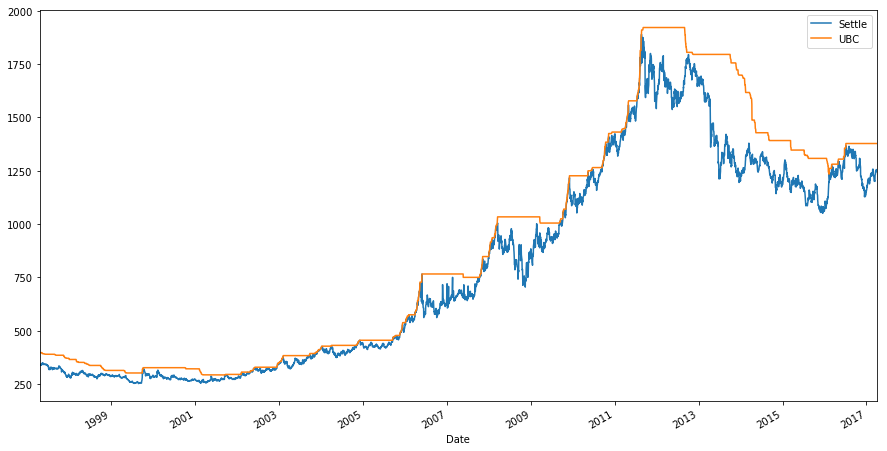

In [21]:
figsize(15,8)
priceData[['Settle','UBC']].tail(5000).plot()

In [8]:
priceData

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1974-12-31,191.0,191.5,182.7,183.9,NaN,183.9,512.0,237.0
1975-01-02,184.0,184.8,173.9,175.1,NaN,175.1,294.0,209.0
1975-01-03,173.0,175.5,170.5,174.7,NaN,174.7,174.0,216.0
1975-01-06,172.0,174.5,167.5,174.4,NaN,174.4,197.0,225.0
1975-01-07,171.0,174.0,168.5,173.4,NaN,173.4,98.0,240.0
1975-01-08,176.0,180.0,176.0,177.4,NaN,177.4,69.0,224.0
1975-01-09,179.0,179.1,177.0,178.3,NaN,178.3,25.0,246.0
1975-01-10,177.0,181.3,176.5,181.3,NaN,181.3,24.0,260.0
1975-01-13,181.0,181.0,178.6,178.6,NaN,178.6,31.0,258.0
